Transfer Learning using PSI
A Pap smear, also called a Pap test, is a procedure to test for cervical cancer in women. A Pap smear involves collecting cells from your cervix — the lower, narrow end of your uterus that's at the top of your vagina. Detecting cervical cancer early with a Pap smear gives you a greater chance at a cure.

In [74]:
import numpy as np
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

# Replace the deprecated import
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy


In [76]:
import cv2
import numpy as np
import os

def preprocess_images_in_folders(root_folder, target_size=(224, 224)):
    all_preprocessed_images = []

    # Iterate over all subfolders in the root folder
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # Check if the path is a directory
        if os.path.isdir(folder_path):
            print(f"Processing images in folder: {folder_name}")

            # Preprocess images in the current folder
            preprocessed_images = preprocess_images_in_folder(folder_path, target_size)

            # Extend the list of all preprocessed images
            all_preprocessed_images.extend(preprocessed_images)

    return all_preprocessed_images

def preprocess_images_in_folder(folder_path, target_size=(224, 224)):
    preprocessed_images = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.bmp')):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)

            # Preprocess the image
            preprocessed_image = preprocess_image(image_path, target_size)

            # Append the preprocessed image to the list
            preprocessed_images.append(preprocessed_image)

    return preprocessed_images

def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image
    image = cv2.resize(image, target_size)

    # Convert the image to grayscale (optional, depending on your task)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values to be between 0 and 1
    image = image.astype(np.float32) / 255.0

    # You can apply additional preprocessing steps here based on your requirements

    return image

# Example usage
root_folder = "C:\\Users\\Asus\\Downloads\\datasets1\\New folder"
all_preprocessed_images = preprocess_images_in_folders(root_folder)




    


Processing images in folder: client1
Processing images in folder: client2
Processing images in folder: client3
Processing images in folder: im_Dyskeratotic
Processing images in folder: im_Koilocytotic
Processing images in folder: im_Metaplastic
Processing images in folder: im_Parabasal
Processing images in folder: im_Superficial-Intermediate


In [77]:
import os
import random
import shutil

main_folder_path ="C:\\Users\\Asus\\Downloads\\datasets1\\New folder"

client_paths = [
   "C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\client1",
   "C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\client2",
   "C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\client3"
  
]

desired_distribution = {
    'im_Dyskeratotic': [300, 50, 400],
    'im_Koilocytotic': [100, 100, 50],
    'im_Metaplastic': [50, 300, 80],
    'im_Parabasal': [134, 84, 3],
    'im_Superficial-Intermediate': [30, 80, 353]
}

# Initialize client data dictionaries
client_data = {client: {} for client in client_paths}

# Iterate through the classes
for class_folder in desired_distribution:
    class_path = os.path.join(main_folder_path, class_folder)

    # Check if the item is a directory (subfolder)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        random.shuffle(class_images)  # Shuffle images randomly

        # Iterate through clients and assign images
        for i, client in enumerate(client_paths):
            start = sum(desired_distribution[class_folder][:i])
            end = sum(desired_distribution[class_folder][:i + 1])

            # Check if the client path exists in the dictionary
            if client in client_data:
                client_data[client].setdefault(class_folder, []).extend(class_images[start:end])

# # Print the resulting distribution for each client
# for client, distribution in client_data.items():
#     print(f"Client: {client}")
#     for class_folder, images in distribution.items():
#         print(f"  {class_folder}: {len(images)} images - {images[:5]}...")

# Copy images to the corresponding client folders
for client, distribution in client_data.items():
    client_folder = os.path.join(client)
    os.makedirs(client_folder, exist_ok=True)

    for class_folder, images in distribution.items():
        class_path = os.path.join(main_folder_path, class_folder)
        dest_path = os.path.join(client_folder, class_folder)
        os.makedirs(dest_path, exist_ok=True)

        for image in images:
            src_path = os.path.join(class_path, image)
            dest_image_path = os.path.join(dest_path, image)
            shutil.copy(src_path, dest_image_path)


In [78]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data1():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory= "C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\client1",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [79]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data2():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory= "C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\client2",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [80]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data3():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory="C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\client3",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [81]:
train1=load_img_data1()
train2=load_img_data2()
train3=load_img_data3()

Found 3649 images belonging to 5 classes.
Found 1736 images belonging to 5 classes.
Found 1948 images belonging to 5 classes.


In [82]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
#     # Your one_hot_encode_labels function here
def on_hot_encode_labels(lables):
    aug_list=[]
    for i in range(len(lables)):
        if lables[i]==0:
            aug_list.append([0,1,0,0,0])
        elif lables[i]==1:
            aug_list.append([1,0,0,0,0])
        elif lables[i]==2:
            aug_list.append([0,0,1,0,0])
        elif lables[i]==3:
            aug_list.append([0,0,0,1,0])
        elif lables[i]==4:
            aug_list.append([0,0,0,0,1])
    return aug_list

In [83]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
    # Your one_hot_encode_labels function here

def load_img_data(test_data):
    img_size = (128, 128)

    # Load images and labels into numpy arrays
    images = []
    labels = []
    for batch in test_data:
        images.extend(batch[0])  # Load images from the batch
        labels.extend(np.argmax(batch[1], axis=1))  # Convert one-hot labels to integers
        if len(labels) >= len(test_data.filenames):
            break

    # Convert labels to one-hot encoded format
    one_hot_labels = on_hot_encode_labels(labels)

    return np.array(images), np.array(one_hot_labels)

In [84]:
train1, label1 = load_img_data(train1)
train2, label2 = load_img_data(train2)
train3, label3 = load_img_data(train3)

In [85]:
train1=train1/255
train2=train2/255
train3=train3/255

In [93]:
import os
import random
import shutil

main_folder_path = "C:\\Users\\Asus\\Downloads\\datasets1\\New folder"
client_paths = ["C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\test"]

desired_distribution = {
    'im_Dyskeratotic': [200],
    'im_Koilocytotic': [200],
    'im_Metaplastic': [200],
    'im_Parabasal': [200],
    'im_Superficial-Intermediate': [200]
}

# Initialize client data dictionaries
client_data = {client: {} for client in client_paths}

# Iterate through the classes
for class_folder in desired_distribution:
    class_path = os.path.join(main_folder_path, class_folder)

    # Check if the item is a directory (subfolder)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        random.shuffle(class_images)  # Shuffle images randomly

        # Iterate through clients and assign images
        for i, client in enumerate(client_paths):
            start = sum(desired_distribution[class_folder][:i])
            end = sum(desired_distribution[class_folder][:i + 1])

            # Check if the client path exists in the dictionary
            if client in client_data:
                client_data[client].setdefault(class_folder, []).extend(class_images[start:end])

# Copy images to the corresponding client folders
for client, distribution in client_data.items():
    for class_folder, images in distribution.items():
        client_folder = os.path.join(client, class_folder)
        os.makedirs(client_folder, exist_ok=True)

        class_path = os.path.join(main_folder_path, class_folder)

        for image in images:
            src_path = os.path.join(class_path, image)
            dest_image_path = os.path.join(client_folder, image)
            shutil.copy(src_path, dest_image_path)


In [95]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory="C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\test",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [96]:

test=load_img_data()

Found 1746 images belonging to 5 classes.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Asus\\Downloads\\datasets1\\New folder\\test'

In [97]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
#     # Your one_hot_encode_labels function here
def on_hot_encode_labels(lables):
    aug_list=[]
    for i in range(len(lables)):
        if lables[i]==0:
            aug_list.append([0,1,0,0,0])
        elif lables[i]==1:
            aug_list.append([1,0,0,0,0])
        elif lables[i]==2:
            aug_list.append([0,0,1,0,0])
        elif lables[i]==3:
            aug_list.append([0,0,0,1,0])
        elif lables[i]==4:
            aug_list.append([0,0,0,0,1])
    return aug_list

In [98]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
    # Your one_hot_encode_labels function here

def load_img_data(test_data):
    img_size = (128, 128)

    # Load images and labels into numpy arrays
    images = []
    labels = []
    for batch in test_data:
        images.extend(batch[0])  # Load images from the batch
        labels.extend(np.argmax(batch[1], axis=1))  # Convert one-hot labels to integers
        if len(labels) >= len(test_data.filenames):
            break

    # Convert labels to one-hot encoded format
    one_hot_labels = on_hot_encode_labels(labels)

    return np.array(images), np.array(one_hot_labels)

In [99]:
test, one_hot_labels = load_img_data(test)

In [100]:
test=test/255

In [101]:
!pip install tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models, optimizers
# import tensorflow_datasets as tfds

class SimpleMLP:
    @staticmethod
    def build():
        # Load the ResNet101V2 model as the base model
        base_model = tf.keras.applications.ResNet101V2(
            include_top=False, weights='imagenet', input_shape=(128, 128, 3)
        )
        
        # Freeze the base model's layers
        base_model.trainable = False

        # Create the transfer learning model by adding custom classification layers on top of the base model
        model = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(512, activation='relu'),
            # Optionally, you can add another dense layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')  # Adjust the number of output classes accordingly
        ])

        # Compile the model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

# Create an instance of the SimpleMLP model
simple_mlp_model = SimpleMLP.build()
global_model=simple_mlp_model

# Display the model summary
simple_mlp_model.summary()

Defaulting to user installation because normal site-packages is not writeable
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 4, 4, 2048)        42626560  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 43741957 (166.86 MB)
Trainable

In [102]:
def create_clients(data_dict):
    '''
    Return a dictionary with keys as client names and values as data and label lists.
    Args: data_dict: A dictionary where keys are client names, and values are tuples of data and labels.
                    For example, {'client_1': (data_1, labels_1), 'client_2': (data_2, labels_2), ...}
    Returns: A dictionary with keys as client names and values as tuples of data and label lists.
    '''
    return data_dict

import tensorflow as tf


def test_model(test, one_hot_labels,  model, comm_round):
    loss,accuracy=model.evaluate(test, one_hot_labels)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, accuracy, loss))
    return accuracy, loss


def avg_weights(scaled_weight_list):
    '''Return the average of the listed scaled weights.'''
    num_clients = len(scaled_weight_list)

    if num_clients == 0:
        return None  # Handle the case where the list is empty

    avg_grad = list()

    # Get the sum of gradients across all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0) / num_clients
        avg_grad.append(layer_mean)

    return avg_grad


client_data = {
    'client_1': (train1,label1),
    'client_2': (train2,label2),
    'client_3': (train3,label3)
    
}

#create clients
clients_batched = create_clients(client_data)

In [103]:
client_names = list(clients_batched.keys())

In [104]:
train1.shape

(3649, 128, 128, 3)

In [105]:
one_hot_labels

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [106]:
comms_round = 40  # Number of global epochs
acc3 = []
local_weight_list = []  # Initialize the list to store local weights

# # Assuming you have a global model defined somewhere before this code
# global_model = ...  # Define or load your global model

# Get the initial weights of the global model
global_weights = global_model.get_weights()

for comm_round in range(comms_round):
    for client in tqdm(client_names, desc='Progress Bar'):
        local_model = SimpleMLP.build()

        local_model.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )

        # Set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        # Fit local model with client's data
        local_model.fit(
            np.array(clients_batched[client][0]),
            np.array(clients_batched[client][1]),
            epochs=2,
            batch_size=32,
            verbose=2
        )

        # Get the scaled model weights and add to the list
        weights = local_model.get_weights()
        local_weight_list.append(weights)

        # Clear the session to free memory after each communication round
        K.clear_session()

    # Calculate the average weights across all clients for each layer
    average_weights = avg_weights(local_weight_list)

    # Update the global model with the average weights
    global_model.set_weights(average_weights)

    # Optionally, you can also test the global model at this point using a separate test dataset
    global_acc, global_loss = test_model(test, one_hot_labels, global_model, comm_round)
    acc3.append(global_acc)


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 50s - loss: 0.5561 - accuracy: 0.7917 - 50s/epoch - 436ms/step
Epoch 2/2
115/115 - 45s - loss: 0.2230 - accuracy: 0.9189 - 45s/epoch - 392ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [01:40<03:21, 100.59s/it]

Epoch 1/2
55/55 - 33s - loss: 0.7471 - accuracy: 0.7293 - 33s/epoch - 592ms/step
Epoch 2/2
55/55 - 33s - loss: 0.2514 - accuracy: 0.9096 - 33s/epoch - 602ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [02:50<01:22, 82.28s/it]

Epoch 1/2
61/61 - 47s - loss: 0.4675 - accuracy: 0.8362 - 47s/epoch - 773ms/step
Epoch 2/2
61/61 - 37s - loss: 0.1636 - accuracy: 0.9420 - 37s/epoch - 612ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [04:23<00:00, 87.94s/it]


55/55 [==============================] - 39s 600ms/step - loss: 0.3272 - accuracy: 0.8786
comm_round: 0 | global_acc: 87.858% | global_loss: 0.3271610140800476


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 84s - loss: 0.5486 - accuracy: 0.8049 - 84s/epoch - 727ms/step
Epoch 2/2
115/115 - 74s - loss: 0.2280 - accuracy: 0.9145 - 74s/epoch - 646ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:47<05:34, 167.46s/it]

Epoch 1/2
55/55 - 44s - loss: 0.7006 - accuracy: 0.7465 - 44s/epoch - 799ms/step
Epoch 2/2
55/55 - 37s - loss: 0.2576 - accuracy: 0.9061 - 37s/epoch - 676ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:18<02:02, 122.26s/it]

Epoch 1/2
61/61 - 47s - loss: 0.4860 - accuracy: 0.8337 - 47s/epoch - 775ms/step
Epoch 2/2
61/61 - 38s - loss: 0.1406 - accuracy: 0.9507 - 38s/epoch - 616ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:51<00:00, 117.24s/it]


55/55 [==============================] - 34s 601ms/step - loss: 0.3066 - accuracy: 0.8923
comm_round: 1 | global_acc: 89.233% | global_loss: 0.3066467046737671


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 79s - loss: 0.5704 - accuracy: 0.7893 - 79s/epoch - 690ms/step
Epoch 2/2
115/115 - 68s - loss: 0.2411 - accuracy: 0.9153 - 68s/epoch - 595ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:36<05:13, 156.86s/it]

Epoch 1/2
55/55 - 45s - loss: 0.6625 - accuracy: 0.7540 - 45s/epoch - 816ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2558 - accuracy: 0.9130 - 34s/epoch - 613ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:04<01:56, 116.14s/it]

Epoch 1/2
61/61 - 45s - loss: 0.4782 - accuracy: 0.8419 - 45s/epoch - 737ms/step
Epoch 2/2
61/61 - 35s - loss: 0.1589 - accuracy: 0.9476 - 35s/epoch - 577ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:33<00:00, 111.09s/it]


55/55 [==============================] - 34s 589ms/step - loss: 0.3040 - accuracy: 0.8952
comm_round: 2 | global_acc: 89.519% | global_loss: 0.3040443956851959


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 79s - loss: 0.5592 - accuracy: 0.7884 - 79s/epoch - 685ms/step
Epoch 2/2
115/115 - 69s - loss: 0.2414 - accuracy: 0.9142 - 69s/epoch - 600ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:36<05:12, 156.21s/it]

Epoch 1/2
55/55 - 43s - loss: 0.7357 - accuracy: 0.7218 - 43s/epoch - 782ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2742 - accuracy: 0.9021 - 34s/epoch - 619ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:01<01:54, 114.77s/it]

Epoch 1/2
61/61 - 45s - loss: 0.4676 - accuracy: 0.8357 - 45s/epoch - 738ms/step
Epoch 2/2
61/61 - 36s - loss: 0.1540 - accuracy: 0.9497 - 36s/epoch - 586ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:31<00:00, 110.52s/it]


55/55 [==============================] - 35s 604ms/step - loss: 0.2865 - accuracy: 0.9009
comm_round: 3 | global_acc: 90.092% | global_loss: 0.2865486741065979


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 93s - loss: 0.5340 - accuracy: 0.8068 - 93s/epoch - 806ms/step
Epoch 2/2
115/115 - 70s - loss: 0.2474 - accuracy: 0.9139 - 70s/epoch - 606ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:54<05:48, 174.31s/it]

Epoch 1/2
55/55 - 42s - loss: 0.7102 - accuracy: 0.7339 - 42s/epoch - 758ms/step
Epoch 2/2
55/55 - 32s - loss: 0.2565 - accuracy: 0.9113 - 32s/epoch - 590ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:17<02:00, 120.92s/it]

Epoch 1/2
61/61 - 46s - loss: 0.4597 - accuracy: 0.8486 - 46s/epoch - 762ms/step
Epoch 2/2
61/61 - 36s - loss: 0.1449 - accuracy: 0.9517 - 36s/epoch - 598ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:49<00:00, 116.40s/it]


55/55 [==============================] - 34s 587ms/step - loss: 0.2914 - accuracy: 0.9009
comm_round: 4 | global_acc: 90.092% | global_loss: 0.2913598120212555


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 79s - loss: 0.5436 - accuracy: 0.7978 - 79s/epoch - 684ms/step
Epoch 2/2
115/115 - 67s - loss: 0.2297 - accuracy: 0.9120 - 67s/epoch - 585ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:34<05:09, 154.57s/it]

Epoch 1/2
55/55 - 41s - loss: 0.6794 - accuracy: 0.7632 - 41s/epoch - 747ms/step
Epoch 2/2
55/55 - 32s - loss: 0.2612 - accuracy: 0.9044 - 32s/epoch - 574ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [03:56<01:51, 111.75s/it]

Epoch 1/2
61/61 - 50s - loss: 0.4569 - accuracy: 0.8465 - 50s/epoch - 827ms/step
Epoch 2/2
61/61 - 36s - loss: 0.1485 - accuracy: 0.9517 - 36s/epoch - 591ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:33<00:00, 111.00s/it]


55/55 [==============================] - 37s 650ms/step - loss: 0.2905 - accuracy: 0.9021
comm_round: 5 | global_acc: 90.206% | global_loss: 0.2904740571975708


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 77s - loss: 0.5286 - accuracy: 0.8101 - 77s/epoch - 674ms/step
Epoch 2/2
115/115 - 69s - loss: 0.2477 - accuracy: 0.9079 - 69s/epoch - 597ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:36<05:12, 156.36s/it]

Epoch 1/2
55/55 - 42s - loss: 0.6667 - accuracy: 0.7512 - 42s/epoch - 761ms/step
Epoch 2/2
55/55 - 32s - loss: 0.2353 - accuracy: 0.9153 - 32s/epoch - 588ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [03:58<01:52, 112.83s/it]

Epoch 1/2
61/61 - 46s - loss: 0.4550 - accuracy: 0.8480 - 46s/epoch - 748ms/step
Epoch 2/2
61/61 - 35s - loss: 0.1608 - accuracy: 0.9461 - 35s/epoch - 577ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:27<00:00, 109.17s/it]


55/55 [==============================] - 33s 575ms/step - loss: 0.2828 - accuracy: 0.9032
comm_round: 6 | global_acc: 90.321% | global_loss: 0.28276553750038147


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 78s - loss: 0.5270 - accuracy: 0.8194 - 78s/epoch - 674ms/step
Epoch 2/2
115/115 - 73s - loss: 0.2315 - accuracy: 0.9142 - 73s/epoch - 637ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:39<05:18, 159.17s/it]

Epoch 1/2
55/55 - 49s - loss: 0.7252 - accuracy: 0.7327 - 49s/epoch - 892ms/step
Epoch 2/2
55/55 - 33s - loss: 0.2778 - accuracy: 0.9003 - 33s/epoch - 591ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:11<01:59, 119.59s/it]

Epoch 1/2
61/61 - 53s - loss: 0.4970 - accuracy: 0.8306 - 53s/epoch - 864ms/step
Epoch 2/2
61/61 - 37s - loss: 0.1421 - accuracy: 0.9553 - 37s/epoch - 607ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:49<00:00, 116.65s/it]


55/55 [==============================] - 36s 633ms/step - loss: 0.2818 - accuracy: 0.9032
comm_round: 7 | global_acc: 90.321% | global_loss: 0.2818182706832886


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 75s - loss: 0.5425 - accuracy: 0.8043 - 75s/epoch - 648ms/step
Epoch 2/2
115/115 - 65s - loss: 0.2354 - accuracy: 0.9134 - 65s/epoch - 566ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:28<04:56, 148.19s/it]

Epoch 1/2
55/55 - 41s - loss: 0.6973 - accuracy: 0.7523 - 41s/epoch - 742ms/step
Epoch 2/2
55/55 - 31s - loss: 0.2802 - accuracy: 0.9055 - 31s/epoch - 568ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [03:48<01:48, 108.37s/it]

Epoch 1/2
61/61 - 46s - loss: 0.4797 - accuracy: 0.8352 - 46s/epoch - 752ms/step
Epoch 2/2
61/61 - 36s - loss: 0.1545 - accuracy: 0.9471 - 36s/epoch - 583ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:18<00:00, 106.09s/it]


55/55 [==============================] - 34s 590ms/step - loss: 0.2855 - accuracy: 0.9044
comm_round: 8 | global_acc: 90.435% | global_loss: 0.2855142056941986


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 80s - loss: 0.5601 - accuracy: 0.7934 - 80s/epoch - 698ms/step
Epoch 2/2
115/115 - 68s - loss: 0.2304 - accuracy: 0.9167 - 68s/epoch - 591ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:41<05:23, 161.63s/it]

Epoch 1/2
55/55 - 44s - loss: 0.6870 - accuracy: 0.7465 - 44s/epoch - 799ms/step
Epoch 2/2
55/55 - 32s - loss: 0.2511 - accuracy: 0.9067 - 32s/epoch - 582ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:06<01:56, 116.40s/it]

Epoch 1/2
61/61 - 49s - loss: 0.4411 - accuracy: 0.8501 - 49s/epoch - 800ms/step
Epoch 2/2
61/61 - 38s - loss: 0.1605 - accuracy: 0.9451 - 38s/epoch - 623ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:42<00:00, 114.04s/it]


55/55 [==============================] - 40s 664ms/step - loss: 0.2850 - accuracy: 0.9049
comm_round: 9 | global_acc: 90.493% | global_loss: 0.28498268127441406


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 93s - loss: 0.5671 - accuracy: 0.7865 - 93s/epoch - 811ms/step
Epoch 2/2
115/115 - 70s - loss: 0.2719 - accuracy: 0.9060 - 70s/epoch - 609ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:54<05:49, 174.55s/it]

Epoch 1/2
55/55 - 44s - loss: 0.7260 - accuracy: 0.7431 - 44s/epoch - 796ms/step
Epoch 2/2
55/55 - 33s - loss: 0.2643 - accuracy: 0.9061 - 33s/epoch - 596ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:21<02:03, 123.02s/it]

Epoch 1/2
61/61 - 46s - loss: 0.4726 - accuracy: 0.8403 - 46s/epoch - 760ms/step
Epoch 2/2
61/61 - 36s - loss: 0.1589 - accuracy: 0.9502 - 36s/epoch - 589ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:52<00:00, 117.61s/it]


55/55 [==============================] - 25s 428ms/step - loss: 0.2828 - accuracy: 0.9021
comm_round: 10 | global_acc: 90.206% | global_loss: 0.2827552258968353


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 61s - loss: 0.5644 - accuracy: 0.7986 - 61s/epoch - 529ms/step
Epoch 2/2
115/115 - 45s - loss: 0.2173 - accuracy: 0.9211 - 45s/epoch - 392ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [01:52<03:44, 112.39s/it]

Epoch 1/2
55/55 - 28s - loss: 0.6965 - accuracy: 0.7529 - 28s/epoch - 502ms/step
Epoch 2/2
55/55 - 21s - loss: 0.2723 - accuracy: 0.9015 - 21s/epoch - 390ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [02:45<01:17, 77.41s/it]

Epoch 1/2
61/61 - 28s - loss: 0.4680 - accuracy: 0.8414 - 28s/epoch - 455ms/step
Epoch 2/2
61/61 - 25s - loss: 0.1551 - accuracy: 0.9446 - 25s/epoch - 407ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [03:41<00:00, 73.96s/it]


55/55 [==============================] - 26s 445ms/step - loss: 0.2807 - accuracy: 0.9021
comm_round: 11 | global_acc: 90.206% | global_loss: 0.28073421120643616


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 55s - loss: 0.5737 - accuracy: 0.7994 - 55s/epoch - 479ms/step
Epoch 2/2
115/115 - 51s - loss: 0.2385 - accuracy: 0.9134 - 51s/epoch - 440ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [01:50<03:41, 110.75s/it]

Epoch 1/2
55/55 - 28s - loss: 0.7305 - accuracy: 0.7356 - 28s/epoch - 510ms/step
Epoch 2/2
55/55 - 24s - loss: 0.2505 - accuracy: 0.9061 - 24s/epoch - 445ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [02:47<01:19, 79.12s/it]

Epoch 1/2
61/61 - 40s - loss: 0.4493 - accuracy: 0.8522 - 40s/epoch - 654ms/step
Epoch 2/2
61/61 - 27s - loss: 0.1630 - accuracy: 0.9435 - 27s/epoch - 441ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [03:58<00:00, 79.45s/it]


55/55 [==============================] - 26s 461ms/step - loss: 0.2817 - accuracy: 0.9015
comm_round: 12 | global_acc: 90.149% | global_loss: 0.2816556692123413


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 68s - loss: 0.5445 - accuracy: 0.7945 - 68s/epoch - 592ms/step
Epoch 2/2
115/115 - 59s - loss: 0.2341 - accuracy: 0.9137 - 59s/epoch - 510ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:15<04:30, 135.34s/it]

Epoch 1/2
55/55 - 31s - loss: 0.7086 - accuracy: 0.7500 - 31s/epoch - 568ms/step
Epoch 2/2
55/55 - 26s - loss: 0.2466 - accuracy: 0.9142 - 26s/epoch - 471ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [03:17<01:32, 92.32s/it]

Epoch 1/2
61/61 - 34s - loss: 0.4744 - accuracy: 0.8378 - 34s/epoch - 565ms/step
Epoch 2/2
61/61 - 30s - loss: 0.1545 - accuracy: 0.9523 - 30s/epoch - 485ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [04:26<00:00, 88.69s/it]


55/55 [==============================] - 26s 451ms/step - loss: 0.2802 - accuracy: 0.9021
comm_round: 13 | global_acc: 90.206% | global_loss: 0.28021371364593506


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 64s - loss: 0.5526 - accuracy: 0.7956 - 64s/epoch - 559ms/step
Epoch 2/2
115/115 - 59s - loss: 0.2196 - accuracy: 0.9137 - 59s/epoch - 509ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:11<04:23, 131.92s/it]

Epoch 1/2
55/55 - 31s - loss: 0.6983 - accuracy: 0.7477 - 31s/epoch - 562ms/step
Epoch 2/2
55/55 - 26s - loss: 0.2489 - accuracy: 0.9194 - 26s/epoch - 468ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [03:13<01:30, 90.42s/it]

Epoch 1/2
61/61 - 34s - loss: 0.4495 - accuracy: 0.8496 - 34s/epoch - 559ms/step
Epoch 2/2
61/61 - 29s - loss: 0.1725 - accuracy: 0.9415 - 29s/epoch - 475ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [04:20<00:00, 86.94s/it]


55/55 [==============================] - 25s 435ms/step - loss: 0.2778 - accuracy: 0.9015
comm_round: 14 | global_acc: 90.149% | global_loss: 0.2777610719203949


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 60s - loss: 0.5474 - accuracy: 0.8021 - 60s/epoch - 523ms/step
Epoch 2/2
115/115 - 54s - loss: 0.2434 - accuracy: 0.9087 - 54s/epoch - 471ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:02<04:05, 122.57s/it]

Epoch 1/2
55/55 - 29s - loss: 0.6872 - accuracy: 0.7425 - 29s/epoch - 521ms/step
Epoch 2/2
55/55 - 26s - loss: 0.2445 - accuracy: 0.9119 - 26s/epoch - 469ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [03:01<01:25, 85.17s/it]

Epoch 1/2
61/61 - 40s - loss: 0.4765 - accuracy: 0.8409 - 40s/epoch - 658ms/step
Epoch 2/2
61/61 - 27s - loss: 0.1457 - accuracy: 0.9487 - 27s/epoch - 447ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [04:13<00:00, 84.39s/it]


55/55 [==============================] - 26s 447ms/step - loss: 0.2790 - accuracy: 0.9032
comm_round: 15 | global_acc: 90.321% | global_loss: 0.2790430784225464


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 56s - loss: 0.5474 - accuracy: 0.8071 - 56s/epoch - 484ms/step
Epoch 2/2
115/115 - 50s - loss: 0.2608 - accuracy: 0.8986 - 50s/epoch - 438ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [01:52<03:44, 112.07s/it]

Epoch 1/2
55/55 - 28s - loss: 0.7166 - accuracy: 0.7304 - 28s/epoch - 513ms/step
Epoch 2/2
55/55 - 23s - loss: 0.2637 - accuracy: 0.8980 - 23s/epoch - 425ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [02:48<01:19, 79.31s/it]

Epoch 1/2
61/61 - 34s - loss: 0.4731 - accuracy: 0.8455 - 34s/epoch - 558ms/step
Epoch 2/2
61/61 - 27s - loss: 0.1735 - accuracy: 0.9415 - 27s/epoch - 438ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [03:54<00:00, 78.08s/it]


55/55 [==============================] - 26s 462ms/step - loss: 0.2800 - accuracy: 0.9032
comm_round: 16 | global_acc: 90.321% | global_loss: 0.2800103724002838


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 55s - loss: 0.5654 - accuracy: 0.7958 - 55s/epoch - 477ms/step
Epoch 2/2
115/115 - 50s - loss: 0.2324 - accuracy: 0.9142 - 50s/epoch - 437ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [01:51<03:42, 111.25s/it]

Epoch 1/2
55/55 - 29s - loss: 0.6961 - accuracy: 0.7431 - 29s/epoch - 530ms/step
Epoch 2/2
55/55 - 24s - loss: 0.2507 - accuracy: 0.9107 - 24s/epoch - 434ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [02:49<01:20, 80.11s/it]

Epoch 1/2
61/61 - 33s - loss: 0.4480 - accuracy: 0.8434 - 33s/epoch - 544ms/step
Epoch 2/2
61/61 - 30s - loss: 0.1863 - accuracy: 0.9369 - 30s/epoch - 484ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [03:58<00:00, 79.38s/it]


55/55 [==============================] - 24s 404ms/step - loss: 0.2797 - accuracy: 0.9044
comm_round: 17 | global_acc: 90.435% | global_loss: 0.27965402603149414


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 58s - loss: 0.5443 - accuracy: 0.8024 - 58s/epoch - 508ms/step
Epoch 2/2
115/115 - 50s - loss: 0.2358 - accuracy: 0.9139 - 50s/epoch - 435ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [01:56<03:53, 116.53s/it]

Epoch 1/2
55/55 - 29s - loss: 0.6625 - accuracy: 0.7552 - 29s/epoch - 526ms/step
Epoch 2/2
55/55 - 24s - loss: 0.2674 - accuracy: 0.9032 - 24s/epoch - 436ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [02:54<01:22, 82.19s/it]

Epoch 1/2
61/61 - 32s - loss: 0.4467 - accuracy: 0.8552 - 32s/epoch - 526ms/step
Epoch 2/2
61/61 - 27s - loss: 0.1628 - accuracy: 0.9487 - 27s/epoch - 450ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [03:59<00:00, 79.87s/it]


55/55 [==============================] - 23s 399ms/step - loss: 0.2796 - accuracy: 0.9026
comm_round: 18 | global_acc: 90.263% | global_loss: 0.2795882225036621


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 67s - loss: 0.5654 - accuracy: 0.8049 - 67s/epoch - 580ms/step
Epoch 2/2
115/115 - 51s - loss: 0.2432 - accuracy: 0.9115 - 51s/epoch - 441ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:03<04:06, 123.09s/it]

Epoch 1/2
55/55 - 29s - loss: 0.6614 - accuracy: 0.7615 - 29s/epoch - 520ms/step
Epoch 2/2
55/55 - 25s - loss: 0.2827 - accuracy: 0.8969 - 25s/epoch - 447ms/step


Progress Bar:  67%|██████████████████████████████████████████████▋                       | 2/3 [03:01<01:25, 85.19s/it]

Epoch 1/2
61/61 - 32s - loss: 0.4802 - accuracy: 0.8429 - 32s/epoch - 523ms/step
Epoch 2/2
61/61 - 27s - loss: 0.1663 - accuracy: 0.9430 - 27s/epoch - 441ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [04:05<00:00, 81.91s/it]


55/55 [==============================] - 41s 710ms/step - loss: 0.2794 - accuracy: 0.9038
comm_round: 19 | global_acc: 90.378% | global_loss: 0.27943214774131775


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 81s - loss: 0.5470 - accuracy: 0.8030 - 81s/epoch - 701ms/step
Epoch 2/2
115/115 - 66s - loss: 0.2348 - accuracy: 0.9109 - 66s/epoch - 576ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:39<05:19, 159.55s/it]

Epoch 1/2
55/55 - 48s - loss: 0.7176 - accuracy: 0.7310 - 48s/epoch - 864ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2566 - accuracy: 0.9090 - 34s/epoch - 611ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:10<01:59, 119.31s/it]

Epoch 1/2
61/61 - 48s - loss: 0.4904 - accuracy: 0.8403 - 48s/epoch - 794ms/step
Epoch 2/2
61/61 - 37s - loss: 0.1508 - accuracy: 0.9507 - 37s/epoch - 607ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:45<00:00, 115.01s/it]


55/55 [==============================] - 36s 622ms/step - loss: 0.2816 - accuracy: 0.9003
comm_round: 20 | global_acc: 90.034% | global_loss: 0.28160688281059265


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 81s - loss: 0.5445 - accuracy: 0.8065 - 81s/epoch - 704ms/step
Epoch 2/2
115/115 - 73s - loss: 0.2335 - accuracy: 0.9107 - 73s/epoch - 637ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:43<05:27, 163.75s/it]

Epoch 1/2
55/55 - 45s - loss: 0.7336 - accuracy: 0.7304 - 45s/epoch - 814ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2888 - accuracy: 0.9003 - 34s/epoch - 614ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:11<01:58, 118.83s/it]

Epoch 1/2
61/61 - 48s - loss: 0.4728 - accuracy: 0.8368 - 48s/epoch - 790ms/step
Epoch 2/2
61/61 - 37s - loss: 0.1708 - accuracy: 0.9374 - 37s/epoch - 604ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:44<00:00, 114.96s/it]


55/55 [==============================] - 36s 633ms/step - loss: 0.2835 - accuracy: 0.8998
comm_round: 21 | global_acc: 89.977% | global_loss: 0.2835467457771301


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 82s - loss: 0.5624 - accuracy: 0.8041 - 82s/epoch - 710ms/step
Epoch 2/2
115/115 - 68s - loss: 0.2744 - accuracy: 0.9002 - 68s/epoch - 595ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:41<05:23, 161.65s/it]

Epoch 1/2
55/55 - 46s - loss: 0.7096 - accuracy: 0.7385 - 46s/epoch - 834ms/step
Epoch 2/2
55/55 - 33s - loss: 0.2592 - accuracy: 0.9078 - 33s/epoch - 605ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:12<01:59, 119.71s/it]

Epoch 1/2
61/61 - 51s - loss: 0.4789 - accuracy: 0.8378 - 51s/epoch - 835ms/step
Epoch 2/2
61/61 - 38s - loss: 0.1705 - accuracy: 0.9440 - 38s/epoch - 625ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:52<00:00, 117.51s/it]


55/55 [==============================] - 56s 1s/step - loss: 0.2826 - accuracy: 0.9015
comm_round: 22 | global_acc: 90.149% | global_loss: 0.28262704610824585


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 84s - loss: 0.5538 - accuracy: 0.8038 - 84s/epoch - 727ms/step
Epoch 2/2
115/115 - 69s - loss: 0.2336 - accuracy: 0.9118 - 69s/epoch - 599ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:41<05:22, 161.29s/it]

Epoch 1/2
55/55 - 47s - loss: 0.7261 - accuracy: 0.7304 - 47s/epoch - 858ms/step
Epoch 2/2
55/55 - 33s - loss: 0.2732 - accuracy: 0.9061 - 33s/epoch - 604ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:10<01:58, 119.00s/it]

Epoch 1/2
61/61 - 50s - loss: 0.4574 - accuracy: 0.8450 - 50s/epoch - 821ms/step
Epoch 2/2
61/61 - 38s - loss: 0.1523 - accuracy: 0.9528 - 38s/epoch - 619ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:52<00:00, 117.41s/it]


55/55 [==============================] - 36s 623ms/step - loss: 0.2847 - accuracy: 0.8992
comm_round: 23 | global_acc: 89.920% | global_loss: 0.28474733233451843


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 80s - loss: 0.5323 - accuracy: 0.8041 - 80s/epoch - 697ms/step
Epoch 2/2
115/115 - 68s - loss: 0.2171 - accuracy: 0.9208 - 68s/epoch - 587ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:40<05:20, 160.18s/it]

Epoch 1/2
55/55 - 45s - loss: 0.7386 - accuracy: 0.7183 - 45s/epoch - 827ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2559 - accuracy: 0.9038 - 34s/epoch - 617ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:08<01:57, 117.81s/it]

Epoch 1/2
61/61 - 51s - loss: 0.4654 - accuracy: 0.8486 - 51s/epoch - 839ms/step
Epoch 2/2
61/61 - 37s - loss: 0.1554 - accuracy: 0.9461 - 37s/epoch - 603ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [05:51<00:00, 117.18s/it]


55/55 [==============================] - 35s 611ms/step - loss: 0.2845 - accuracy: 0.9015
comm_round: 24 | global_acc: 90.149% | global_loss: 0.28454190492630005


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 87s - loss: 0.5630 - accuracy: 0.7964 - 87s/epoch - 755ms/step
Epoch 2/2
115/115 - 71s - loss: 0.2393 - accuracy: 0.9079 - 71s/epoch - 619ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:49<05:38, 169.45s/it]

Epoch 1/2
55/55 - 52s - loss: 0.6870 - accuracy: 0.7483 - 52s/epoch - 945ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2447 - accuracy: 0.9130 - 34s/epoch - 623ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:27<02:07, 127.37s/it]

Epoch 1/2
61/61 - 51s - loss: 0.4496 - accuracy: 0.8522 - 51s/epoch - 837ms/step
Epoch 2/2
61/61 - 38s - loss: 0.1492 - accuracy: 0.9502 - 38s/epoch - 616ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [06:06<00:00, 122.21s/it]


55/55 [==============================] - 38s 658ms/step - loss: 0.2856 - accuracy: 0.9009
comm_round: 25 | global_acc: 90.092% | global_loss: 0.28562110662460327


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 88s - loss: 0.5319 - accuracy: 0.8115 - 88s/epoch - 762ms/step
Epoch 2/2
115/115 - 72s - loss: 0.2386 - accuracy: 0.9115 - 72s/epoch - 628ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:50<05:41, 170.81s/it]

Epoch 1/2
55/55 - 50s - loss: 0.7167 - accuracy: 0.7494 - 50s/epoch - 911ms/step
Epoch 2/2
55/55 - 36s - loss: 0.2679 - accuracy: 0.9026 - 36s/epoch - 654ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:32<02:10, 130.24s/it]

Epoch 1/2
61/61 - 52s - loss: 0.4778 - accuracy: 0.8434 - 52s/epoch - 860ms/step
Epoch 2/2
61/61 - 39s - loss: 0.1487 - accuracy: 0.9440 - 39s/epoch - 634ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [06:15<00:00, 125.29s/it]


55/55 [==============================] - 39s 676ms/step - loss: 0.2856 - accuracy: 0.9003
comm_round: 26 | global_acc: 90.034% | global_loss: 0.28561004996299744


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 125s - loss: 0.5376 - accuracy: 0.8071 - 125s/epoch - 1s/step
Epoch 2/2
115/115 - 75s - loss: 0.2578 - accuracy: 0.9038 - 75s/epoch - 650ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [03:33<07:07, 213.89s/it]

Epoch 1/2
55/55 - 48s - loss: 0.6849 - accuracy: 0.7621 - 48s/epoch - 873ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2411 - accuracy: 0.9073 - 34s/epoch - 624ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [05:07<02:23, 143.36s/it]

Epoch 1/2
61/61 - 50s - loss: 0.4706 - accuracy: 0.8424 - 50s/epoch - 820ms/step
Epoch 2/2
61/61 - 39s - loss: 0.1578 - accuracy: 0.9492 - 39s/epoch - 631ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [06:47<00:00, 135.80s/it]


55/55 [==============================] - 36s 630ms/step - loss: 0.2865 - accuracy: 0.8992
comm_round: 27 | global_acc: 89.920% | global_loss: 0.2865167558193207


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 90s - loss: 0.5322 - accuracy: 0.8126 - 90s/epoch - 784ms/step
Epoch 2/2
115/115 - 73s - loss: 0.2379 - accuracy: 0.9148 - 73s/epoch - 636ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:52<05:44, 172.13s/it]

Epoch 1/2
55/55 - 49s - loss: 0.7032 - accuracy: 0.7552 - 49s/epoch - 889ms/step
Epoch 2/2
55/55 - 35s - loss: 0.2656 - accuracy: 0.9032 - 35s/epoch - 630ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:24<02:04, 124.99s/it]

Epoch 1/2
61/61 - 51s - loss: 0.4693 - accuracy: 0.8522 - 51s/epoch - 831ms/step
Epoch 2/2
61/61 - 37s - loss: 0.1605 - accuracy: 0.9476 - 37s/epoch - 612ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [06:03<00:00, 121.18s/it]


55/55 [==============================] - 37s 639ms/step - loss: 0.2871 - accuracy: 0.8992
comm_round: 28 | global_acc: 89.920% | global_loss: 0.28714415431022644


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 91s - loss: 0.5545 - accuracy: 0.8010 - 91s/epoch - 795ms/step
Epoch 2/2
115/115 - 81s - loss: 0.2209 - accuracy: 0.9156 - 81s/epoch - 704ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [03:05<06:11, 185.99s/it]

Epoch 1/2
55/55 - 51s - loss: 0.7604 - accuracy: 0.7270 - 51s/epoch - 931ms/step
Epoch 2/2
55/55 - 38s - loss: 0.2631 - accuracy: 0.9038 - 38s/epoch - 683ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:48<02:16, 136.89s/it]

Epoch 1/2
61/61 - 56s - loss: 0.4640 - accuracy: 0.8434 - 56s/epoch - 920ms/step
Epoch 2/2
61/61 - 41s - loss: 0.1666 - accuracy: 0.9389 - 41s/epoch - 666ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [06:38<00:00, 132.91s/it]


55/55 [==============================] - 39s 681ms/step - loss: 0.2881 - accuracy: 0.8998
comm_round: 29 | global_acc: 89.977% | global_loss: 0.2880716621875763


Progress Bar:   0%|                                                                              | 0/3 [00:00<?, ?it/s]

Epoch 1/2
115/115 - 88s - loss: 0.5697 - accuracy: 0.7931 - 88s/epoch - 764ms/step
Epoch 2/2
115/115 - 73s - loss: 0.2323 - accuracy: 0.9175 - 73s/epoch - 634ms/step


Progress Bar:  33%|███████████████████████                                              | 1/3 [02:53<05:46, 173.45s/it]

Epoch 1/2
55/55 - 48s - loss: 0.7258 - accuracy: 0.7252 - 48s/epoch - 879ms/step
Epoch 2/2
55/55 - 34s - loss: 0.2393 - accuracy: 0.9136 - 34s/epoch - 617ms/step


Progress Bar:  67%|██████████████████████████████████████████████                       | 2/3 [04:26<02:06, 126.25s/it]

Epoch 1/2
61/61 - 55s - loss: 0.4437 - accuracy: 0.8506 - 55s/epoch - 906ms/step
Epoch 2/2
61/61 - 39s - loss: 0.1536 - accuracy: 0.9497 - 39s/epoch - 640ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [06:13<00:00, 124.57s/it]


KeyboardInterrupt: 

In [ ]:
global_model.predict(test[0])

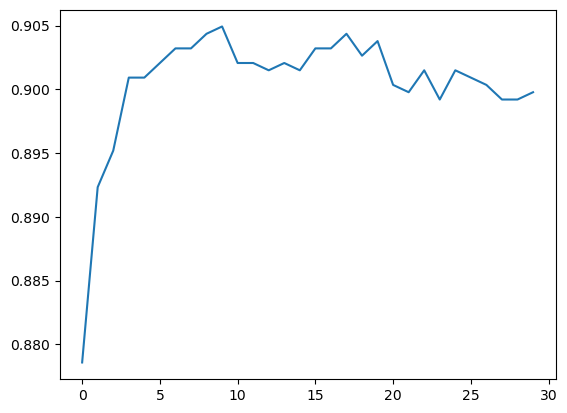

In [107]:
import matplotlib.pyplot as plt
plt.plot(acc3)

In [108]:
acc3=np.array(acc3)

In [109]:
global_model.evaluate(test,one_hot_labels)

55/55 [==============================] - 39s 677ms/step - loss: 0.2881 - accuracy: 0.8998


[0.2880716621875763, 0.8997709155082703]

In [110]:
np.save("acc_fedavg_pap.npy",acc3)

In [111]:
global_model.save("fedavg_pap.h5")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [112]:
a=np.load("acc_fedavg_pap.npy")

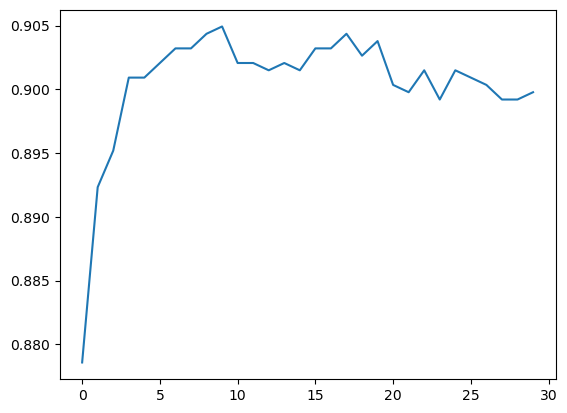

In [113]:
plt.plot(a)